In [1]:
import pandas as pd
from datetime import datetime
import glob
import os
import math
from IPython.display import display
from IPython.display import display, HTML
# To be able to read XLS files
# pip install xlrd

## Interactive df tables


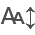

In [2]:
# pip install itables
from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)
from itables import show
# show(df, maxBytes=0)

# Showing index
import itables.options as opt
opt.showIndex = True

# Turning off downsampling of data while printing it
import itables.options as opt
opt.maxBytes = 0

In [3]:
path_qgis = r'C:\Users\muij\OneDrive - Norwegian University of Life Sciences\Documents\+Combining ALL DATA with Agro\PhenoCrop 2023'

In [4]:
path_agro = r'C:\Users\muij\OneDrive - Norwegian University of Life Sciences\Documents\+Combining ALL DATA with Agro\PhenoCrop 2023\AGRO DATA 2023'

In [5]:
all_files_qgis = glob.glob(path_qgis + "/*.xlsx")
# all_files_qgis

In [6]:
# Importing all the datasets except those from Mavic3RGB images since we need the Multispectral data only

list_df_names = []
for filepath in all_files_qgis:
    if not("M3RGB") in filepath:
        file_name=os.path.basename(filepath[:-5]).replace('-','_')
        list_df_names.append(file_name)
        
        # print(filepath,os.path.basename(filepath[:-5]))
        locals()[file_name] = pd.read_excel(filepath, index_col=None, header=0)
        print(file_name, '=====', locals()[file_name].shape)

phenocrop_2023_P4M_20m_20230623 ===== (760, 19)
phenocrop_2023_P4M_20m_20230628 ===== (760, 19)
phenocrop_2023_P4M_20m_20230708 ===== (760, 28)
phenocrop_2023_P4M_20m_20230714 ===== (760, 16)
phenocrop_2023_P4M_20m_20230719 ===== (760, 19)
phenocrop_2023_P4M_20m_20230727 ===== (760, 19)
phenocrop_M3MS_20m_20230614 ===== (760, 16)
Phenocrop_M3MS_20m_20230622 ===== (760, 16)
phenocrop_M3MS_20m_20230628 ===== (760, 16)
phenocrop_M3MS_20m_20230708 ===== (760, 16)
phenocrop_M3MS_20m_20230714 ===== (760, 16)


In [7]:
# Since one dataset has more than 19 columns,
# and after checking them manually it was found that the ones after the 19th columns are not relevant,
# keeping only the first 19 columns here.

for dfs in list_df_names:
    # print(dfs, locals()[dfs].shape)
    locals()[dfs] = locals()[dfs].iloc[:,:19]
    print(dfs, locals()[dfs].shape)

phenocrop_2023_P4M_20m_20230623 (760, 19)
phenocrop_2023_P4M_20m_20230628 (760, 19)
phenocrop_2023_P4M_20m_20230708 (760, 19)
phenocrop_2023_P4M_20m_20230714 (760, 16)
phenocrop_2023_P4M_20m_20230719 (760, 19)
phenocrop_2023_P4M_20m_20230727 (760, 19)
phenocrop_M3MS_20m_20230614 (760, 16)
Phenocrop_M3MS_20m_20230622 (760, 16)
phenocrop_M3MS_20m_20230628 (760, 16)
phenocrop_M3MS_20m_20230708 (760, 16)
phenocrop_M3MS_20m_20230714 (760, 16)


# One dataset has blue values missing. Will have to fix that processing in QGIS later. Right now moving forward with the missing values.

# Adding date column

In [8]:
# Adding respective date column in each dataset
for dfs in list_df_names:

    date_from_dfs_name = dfs[-8:]
    # Converting date str to datetime object
    date_obj = datetime.strptime(date_from_dfs_name, '%Y%m%d')
    # Converting datetime obj to formatted date str
    date_str = date_obj.strftime('%m-%d-%Y')

    # Adding a column with formatted date in the dataset
    locals()[dfs]["date"]= date_str
    print(dfs, locals()[dfs].shape)


phenocrop_2023_P4M_20m_20230623 (760, 20)
phenocrop_2023_P4M_20m_20230628 (760, 20)
phenocrop_2023_P4M_20m_20230708 (760, 20)
phenocrop_2023_P4M_20m_20230714 (760, 17)
phenocrop_2023_P4M_20m_20230719 (760, 20)
phenocrop_2023_P4M_20m_20230727 (760, 20)
phenocrop_M3MS_20m_20230614 (760, 17)
Phenocrop_M3MS_20m_20230622 (760, 17)
phenocrop_M3MS_20m_20230628 (760, 17)
phenocrop_M3MS_20m_20230708 (760, 17)
phenocrop_M3MS_20m_20230714 (760, 17)


## Rededge Mean is not named the same in all the datasets

red_edgestdev vs red_edge_stdev


red_edgemean vs red_edge_mean

## Sorting Columns with blue and date in the end

In [9]:
for dfs in list_df_names:
    
    # Correcting the names of red_edge column headers
    # red_edgestdev to red_edge_stdev
    # red_edgemean to red_edge_mean
    # red_edgemedian to red_edge_median

    for x in locals()[dfs].columns.tolist():
        if 'red_ed' in x:
            if "mean" in x:
                locals()[dfs].rename(columns={x:"red_edge_mean"}, inplace = True)
            if "med" in x:
                locals()[dfs].rename(columns={x:"red_edge_median"}, inplace = True)
            if "std" in x:
                locals()[dfs].rename(columns={x:"red_edge_stdev"}, inplace = True)

    # Creating a list of column headings, sorted
    cols = sorted(locals()[dfs].columns.tolist())
    

                
    # Sorting the list again to ensure the desired order
    cols = sorted(cols)

    # Converting all column names to lower case
    cols_lower = list(map(str.lower,cols))
    
    # Repositioning the ID Column to position zero
    old_index = cols_lower.index('id')
    cols_lower.insert(0, cols_lower.pop(old_index))
    # print(cols_lower)
    
    # Listing all headers for blue index if any
    append_list = []
    for x in cols_lower:
        if 'blue' in x:
            append_list.append(x)
    
    # Adding the date column header to the append_list
    for x in cols_lower:
        if 'date' in x:
            append_list.append(x)

    # Sorting the list
    append_list_sorted =sorted(append_list)
    # print(append_list_sorted)


    # Subtracting the items from list to be appended from the columns list
    # since they will be appended to the end of the list later 
    
    blue_dropped = [elem for elem in cols_lower if elem not in append_list_sorted]
    merged_lists = blue_dropped + append_list_sorted
    print(dfs)
    # print(merged_lists)
    # Updating the column names with updated headers
    locals()[dfs] = locals()[dfs].reindex(columns = merged_lists)

phenocrop_2023_P4M_20m_20230623
phenocrop_2023_P4M_20m_20230628
phenocrop_2023_P4M_20m_20230708
phenocrop_2023_P4M_20m_20230714
phenocrop_2023_P4M_20m_20230719
phenocrop_2023_P4M_20m_20230727
phenocrop_M3MS_20m_20230614
Phenocrop_M3MS_20m_20230622
phenocrop_M3MS_20m_20230628
phenocrop_M3MS_20m_20230708
phenocrop_M3MS_20m_20230714


In [10]:
# # Printing all the headers/column headings for all sheets
# for sheets in list_df_names:
#     print(locals()[sheets].shape[1])
#     display(locals()[sheets].head(0))

# Importing AGRO DATA

In [11]:
all_files_agro = glob.glob(path_agro + "/*.xls")
all_files_agro

['C:\\Users\\muij\\OneDrive - Norwegian University of Life Sciences\\Documents\\+Combining ALL DATA with Agro\\PhenoCrop 2023\\AGRO DATA 2023\\23TVollebekk-avling data fra JAD_231106.xls']

In [12]:
# Listing all sheets in the xls file
sheets_agro = []

for filepath in all_files_agro:
    file_name=os.path.basename(filepath).replace('-','_')
    agro_data_obj = pd.ExcelFile(filepath)
    sheets_in_xls = pd.ExcelFile(filepath).sheet_names

    # Importing data from the sheets to respective sheeet name+'df_' prefix
    for sheet in sheets_in_xls:
        sheet_df = 'df_'+sheet
        locals()[sheet_df] = agro_data_obj.parse(sheet)
        sheets_agro.append(sheet_df)
        # print(locals()[sheet_df].shape)

In [13]:
# Fixing the column names in the agro data

for sheet_df in sheets_agro:
    df_temp = locals()[sheet_df].copy()
    cols_row1 = df_temp.columns[:].tolist()
    cols_row2 = df_temp.iloc[0,:].tolist()
    
    # Eliminating Nan values in the lists
    cols_row1 = ['' if pd.isna(x) else x for x in cols_row1]
    cols_row2 = ['' if pd.isna(x) else x for x in cols_row2]
    
    # Eliminating unnamed entries in the first column
    cols_row1 = ['' if 'Unnamed' in x else x for x in cols_row1]
    # Lising the corrected columns
    cols_corrected = list(map(''.join, zip(cols_row1, cols_row2)))

    # Correcting a mistake in column headings where the header after Plot is sometimes named entry and others bloc and also empty in one case
    cols_corrected[3] = 'entry/bloc'

    # Renaming the PLOT column heading to ID
    cols_corrected[2] = 'id'

    # converting all headers to lower case to avoid missmatching names when merging/concatng sheets
    cols_corrected = list(map(str.lower,cols_corrected))
    
    # Assigning new corrected columns to the sheet
    df_temp.columns = cols_corrected

    #Assigning the processed data to the original sheet df name
    locals()[sheet_df] = df_temp.copy()
    # print(locals()[sheet_df].shape)

In [14]:
# cols_corrected

In [15]:
# Droppping the unnecessary rows originating from the column headings in the xls file
for sheet_df in sheets_agro:
    df_temp2 = locals()[sheet_df].copy()

    # Finding the row with all Nan entries since the rows before that one are the column headers
    for row in range(df_temp2.shape[0]):
        # print(row)
        # the following code can cause problems if here are multiple empty rows in a dataset
        if df_temp2.iloc[row,:].isnull().all():
            cutoff_row = row
    
    # Dropping the false heading rows based on the cutoff_row found out in the previous step 
    df_temp2 = df_temp2.drop(df_temp2.index[range(cutoff_row+1)]).reset_index(drop=True)

    #Assigning the processed data to the original sheet df name
    locals()[sheet_df] = df_temp2.copy()
    # print(locals()[sheet_df].shape)

## Printing all the headers/column headings for all sheets


In [16]:
# # Printing all the headers/column headings for all sheets
# for sheets in sheets_agro:
#     print(locals()[sheets].shape[1])
#     display(locals()[sheets].head(0))

In [17]:
# for sheets in sheets_agro:
#     print(locals()[sheets].shape)

# Conct all sheets

In [18]:
full_agro = locals()[sheets_agro[0]].copy()

for sheet_df in sheets_agro[1:]:

    # # Investagsting where an additional column was added to the full_agro df when sheet df_23T6B4 was merged.
    # # Found that one of the headings had all lower case letters while the same heading in other dfs started with an
    # # uppser case letter.
    # print(all(full_agro.columns == locals()[sheet_df].columns))
    # print(full_agro.columns)
    # print(locals()[sheet_df].columns)
    
    # print(sheet_df, full_agro.shape, locals()[sheet_df].shape)
    full_agro = pd.concat([full_agro, locals()[sheet_df]], axis=0)
    
    # print(sheet_df, full_agro.shape, locals()[sheet_df].shape)
    # display(full_agro.head(0))
display(full_agro)


r_expt r_location   id entry/bloc         name             pedigree  \
0    23T1A 4  Vollebekk  107        8.0 NaN   Festus  Demonstrant/SW51114   
1    23T1A 4  Vollebekk  108       24.0 NaN  GN22529    Russland4/GN05567   
2    23T1A 4  Vollebekk  109       18.0 NaN  GN18715      GN07574/GN05567   
3    23T1A 4  Vollebekk  110       13.0 NaN  Leijona                  NaN   
4    23T1A 4  Vollebekk  111        1.0 NaN    Zebra         Ralle/Dragon   
..       ...        ...  ...        ...  ..      ...                  ...   
45  23T12B 4  Vollebekk  885          2 NaN  GN23669      GN06578/GN08530   
46  23T12B 4  Vollebekk  886          2 NaN  GN23679      Amulett/GN08581   
47  23T12B 4  Vollebekk  887          2 NaN  GN23676      SW21307/Mirakel   
48  23T12B 4  Vollebekk  888          2 NaN  GN23665      GN09543/GN07501   
49  23T12B 4  Vollebekk  889          2 NaN  GN23675      SW71139/GN04526   

   legde pl.høyde etter-ren. akssk.juni gulm.aug. rå rute-avling  \
0      0       66         25         27        22           3.87   
1      0       67         20         25        21           3.07   
2      0       69         20         25        22           3.97   
3      0       63         20         28        22           3.76   
4      0       67         20         26        21           3.67   
..   ...      ...        ...        ...       ...            ...   
45     0       72          5         29        23           5.16   
46     0       72          2         27        21           4.47   
47     0       72          5         27        26           5.78   
48     0       81          5         28        26            4.9   
49     0       89          5         27        21           5.57   

   tørr rute-avling vanntørr      %vann avlingkg/daa  
0              3171     11.7   27.64876   439.214588  
1              2596     11.7   25.33329   359.571451  
2              3248     11.7  27.758589   449.879843  
3              3141     11.7  26.236622   435.059294  
4              3066     11.7  26.232207   424.671059  
..              ...      ...        ...          ...  
45             4169     12.3  29.143159   573.523608  
46             3741     12.3  26.602752   514.644235  
47             4658     12.3  29.324118   640.794667  
48             4038     12.3  27.728041   555.502118  
49             4621     12.3  27.242065   635.704627  

[600 rows x 17 columns]

In [19]:
# display(HTML(pd.concat([df_23T1A, df_23T2A], axis=0).to_html()))
# pd.concat([df_23T1A, df_23T2A], axis=0).shape

# Merge the Agro data with the indices data

## Merging the agro data with each flight data individually

In [20]:
list_df_agro = []

for dfs in list_df_names:
    dfs_temp = dfs+'_agro'
    locals()[dfs_temp] = pd.merge(full_agro, locals()[dfs], on="id")
    list_df_agro.append(dfs_temp)

In [21]:
list_df_agro

['phenocrop_2023_P4M_20m_20230623_agro',
 'phenocrop_2023_P4M_20m_20230628_agro',
 'phenocrop_2023_P4M_20m_20230708_agro',
 'phenocrop_2023_P4M_20m_20230714_agro',
 'phenocrop_2023_P4M_20m_20230719_agro',
 'phenocrop_2023_P4M_20m_20230727_agro',
 'phenocrop_M3MS_20m_20230614_agro',
 'Phenocrop_M3MS_20m_20230622_agro',
 'phenocrop_M3MS_20m_20230628_agro',
 'phenocrop_M3MS_20m_20230708_agro',
 'phenocrop_M3MS_20m_20230714_agro']

In [22]:
phenocrop_2023_P4M_20m_20230623_agro

r_expt r_location   id entry/bloc         name             pedigree  \
0     23T1A 4  Vollebekk  107        8.0 NaN   Festus  Demonstrant/SW51114   
1     23T1A 4  Vollebekk  108       24.0 NaN  GN22529    Russland4/GN05567   
2     23T1A 4  Vollebekk  109       18.0 NaN  GN18715      GN07574/GN05567   
3     23T1A 4  Vollebekk  110       13.0 NaN  Leijona                  NaN   
4     23T1A 4  Vollebekk  111        1.0 NaN    Zebra         Ralle/Dragon   
..        ...        ...  ...        ...  ..      ...                  ...   
595  23T12B 4  Vollebekk  885          2 NaN  GN23669      GN06578/GN08530   
596  23T12B 4  Vollebekk  886          2 NaN  GN23679      Amulett/GN08581   
597  23T12B 4  Vollebekk  887          2 NaN  GN23676      SW21307/Mirakel   
598  23T12B 4  Vollebekk  888          2 NaN  GN23665      GN09543/GN07501   
599  23T12B 4  Vollebekk  889          2 NaN  GN23675      SW71139/GN04526   

    legde pl.høyde etter-ren.  ... red_edge_mean red_edge_median  \
0       0       66         25  ...      0.143535        0.141264   
1       0       67         20  ...      0.145958        0.147083   
2       0       69         20  ...      0.143123        0.141644   
3       0       63         20  ...      0.151097        0.152030   
4       0       67         20  ...      0.146759        0.145755   
..    ...      ...        ...  ...           ...             ...   
595     0       72          5  ...      0.141945        0.143168   
596     0       72          2  ...      0.145105        0.146750   
597     0       72          5  ...      0.121603        0.122778   
598     0       81          5  ...      0.147518        0.148842   
599     0       89          5  ...      0.147321        0.148525   

    red_edge_stdev  red_mean red_median red_stdev blue_mean  blue_median  \
0         0.034494  0.035824   0.035081  0.007545  0.027839     0.027391   
1         0.032814  0.027515   0.026834  0.005707  0.023538     0.023264   
2         0.033515  0.031416   0.030750  0.006323  0.025517     0.025070   
3         0.032390  0.029030   0.028630  0.005299  0.025654     0.025362   
4         0.033703  0.030572   0.030076  0.006376  0.025695     0.025300   
..             ...       ...        ...       ...       ...          ...   
595       0.038641  0.028960   0.028051  0.008229  0.023975     0.023686   
596       0.037734  0.028067   0.026985  0.007990  0.024225     0.023727   
597       0.042460  0.028838   0.026531  0.011126  0.021885     0.021378   
598       0.041859  0.031940   0.029889  0.011175  0.025139     0.024693   
599       0.035312  0.032168   0.030164  0.010106  0.025922     0.025492   

     blue_stdev        date  
0      0.005295  06-23-2023  
1      0.004226  06-23-2023  
2      0.004869  06-23-2023  
3      0.004711  06-23-2023  
4      0.005038  06-23-2023  
..          ...         ...  
595    0.005488  06-23-2023  
596    0.005707  06-23-2023  
597    0.005717  06-23-2023  
598    0.006143  06-23-2023  
599    0.005760  06-23-2023  

[600 rows x 36 columns]

## Adding Camera Model and Field Name columns in the datasets

In [23]:
# Adding the camera model information into a new column based on the drone used for the respective flights
# Camera Model
# Location
# Adding respective date column in each dataset

for agro_df in list_df_agro:
    # If the flight is from Phantom 4 Multispectral
    if 'p4m' in agro_df.lower():
        locals()[agro_df].insert(2,"camera", "P4M")
        locals()[agro_df].insert(2,"field", "PhenoCrop")

    # If the flight is from Mavic 3 Multispectral
    if 'm3m' in agro_df.lower():
        locals()[agro_df].insert(2,"camera", "M3M")
        locals()[agro_df].insert(2,"field", "PhenoCrop")

## Merging all datasets into one

In [24]:
all_data_2023 = locals()[list_df_agro[0]].copy()

for agro_df in list_df_agro[1:]:
    all_data_2023 = pd.concat([all_data_2023, locals()[agro_df]], axis=0)
    # print(locals()[agro_df].iloc[:,17:].shape, agro_df)
    # display(locals()[agro_df].iloc[:,17:].head(1))
all_data_2023

r_expt r_location      field camera   id entry/bloc         name  \
0     23T1A 4  Vollebekk  PhenoCrop    P4M  107        8.0 NaN   Festus   
1     23T1A 4  Vollebekk  PhenoCrop    P4M  108       24.0 NaN  GN22529   
2     23T1A 4  Vollebekk  PhenoCrop    P4M  109       18.0 NaN  GN18715   
3     23T1A 4  Vollebekk  PhenoCrop    P4M  110       13.0 NaN  Leijona   
4     23T1A 4  Vollebekk  PhenoCrop    P4M  111        1.0 NaN    Zebra   
..        ...        ...        ...    ...  ...        ...  ..      ...   
595  23T12B 4  Vollebekk  PhenoCrop    M3M  885          2 NaN  GN23669   
596  23T12B 4  Vollebekk  PhenoCrop    M3M  886          2 NaN  GN23679   
597  23T12B 4  Vollebekk  PhenoCrop    M3M  887          2 NaN  GN23676   
598  23T12B 4  Vollebekk  PhenoCrop    M3M  888          2 NaN  GN23665   
599  23T12B 4  Vollebekk  PhenoCrop    M3M  889          2 NaN  GN23675   

                pedigree legde  ... red_edge_mean red_edge_median  \
0    Demonstrant/SW51114     0  ...      0.143535        0.141264   
1      Russland4/GN05567     0  ...      0.145958        0.147083   
2        GN07574/GN05567     0  ...      0.143123        0.141644   
3                    NaN     0  ...      0.151097        0.152030   
4           Ralle/Dragon     0  ...      0.146759        0.145755   
..                   ...   ...  ...           ...             ...   
595      GN06578/GN08530     0  ...      0.193922        0.193659   
596      Amulett/GN08581     0  ...      0.190445        0.189701   
597      SW21307/Mirakel     0  ...      0.179917        0.178993   
598      GN09543/GN07501     0  ...      0.188636        0.187721   
599      SW71139/GN04526     0  ...      0.190516        0.190606   

    red_edge_stdev  red_mean red_median red_stdev blue_mean blue_median  \
0         0.034494  0.035824   0.035081  0.007545  0.027839    0.027391   
1         0.032814  0.027515   0.026834  0.005707  0.023538    0.023264   
2         0.033515  0.031416   0.030750  0.006323  0.025517    0.025070   
3         0.032390  0.029030   0.028630  0.005299  0.025654    0.025362   
4         0.033703  0.030572   0.030076  0.006376  0.025695    0.025300   
..             ...       ...        ...       ...       ...         ...   
595       0.021804  0.076133   0.071958  0.021946       NaN         NaN   
596       0.021185  0.072185   0.068217  0.019862       NaN         NaN   
597       0.021155  0.083278   0.075581  0.029974       NaN         NaN   
598       0.020705  0.086246   0.080662  0.027253       NaN         NaN   
599       0.019929  0.081864   0.077417  0.023182       NaN         NaN   

    blue_stdev        date  
0     0.005295  06-23-2023  
1     0.004226  06-23-2023  
2     0.004869  06-23-2023  
3     0.004711  06-23-2023  
4     0.005038  06-23-2023  
..         ...         ...  
595        NaN  07-14-2023  
596        NaN  07-14-2023  
597        NaN  07-14-2023  
598        NaN  07-14-2023  
599        NaN  07-14-2023  

[6600 rows x 38 columns]

## Finding total number of missing values in each dataset

In [25]:
# Printing all the headers/column headings for all sheets
for sheets in list_df_agro:
    print(sheets, locals()[sheets].shape)
    display(sum(locals()[sheets].isnull().sum().to_list()))
    # display(locals()[sheets].head(0))

phenocrop_2023_P4M_20m_20230623_agro (600, 38)


635

phenocrop_2023_P4M_20m_20230628_agro (600, 38)


635

phenocrop_2023_P4M_20m_20230708_agro (600, 38)


635

phenocrop_2023_P4M_20m_20230714_agro (600, 35)


635

phenocrop_2023_P4M_20m_20230719_agro (600, 38)


635

phenocrop_2023_P4M_20m_20230727_agro (600, 38)


635

phenocrop_M3MS_20m_20230614_agro (600, 35)


635

Phenocrop_M3MS_20m_20230622_agro (600, 35)


635

phenocrop_M3MS_20m_20230628_agro (600, 35)


635

phenocrop_M3MS_20m_20230708_agro (600, 35)


635

phenocrop_M3MS_20m_20230714_agro (600, 35)


635

Since there are 600 rows and one column in each dataset is empty anyway, 635 Nan entries are not extraordinary.

## Summary of Missing values in the entire dataset


In [26]:
# Missing values in the entire dataset

for columns in all_data_2023.columns:
    print(all_data_2023[columns].isnull().sum(), ' missing values in ', columns)
# all_data_2023.isnull().sum().to_list()

0  missing values in  r_expt
0  missing values in  r_location
0  missing values in  field
0  missing values in  camera
0  missing values in  id
0  missing values in  entry/bloc
6600  missing values in  
0  missing values in  name
176  missing values in  pedigree
22  missing values in  legde
22  missing values in  pl.høyde
22  missing values in  etter-ren.
22  missing values in  akssk.juni
22  missing values in  gulm.aug.
11  missing values in  rå rute-avling
33  missing values in  tørr rute-avling
22  missing values in  vanntørr
22  missing values in  %vann
11  missing values in  avlingkg/daa
0  missing values in  green_mean
0  missing values in  green_median
0  missing values in  green_stdev
0  missing values in  ndvi_mean
0  missing values in  ndvi_median
0  missing values in  ndvi_stdev
0  missing values in  nir_mean
0  missing values in  nir_median
0  missing values in  nir_stdev
0  missing values in  red_edge_mean
0  missing values in  red_edge_median
0  missing values in  red_edg

## Dropping the columns with all Nan values

In [27]:
all_data_2023_no_nan = all_data_2023.dropna(axis=1, how='all')

In [28]:
# Missing values in the entire dataset

for columns in all_data_2023_no_nan.columns:
    print(all_data_2023_no_nan[columns].isnull().sum(), ' missing values in ', columns)
# all_data_2023_no_nan.isnull().sum().to_list()

0  missing values in  r_expt
0  missing values in  r_location
0  missing values in  field
0  missing values in  camera
0  missing values in  id
0  missing values in  entry/bloc
0  missing values in  name
176  missing values in  pedigree
22  missing values in  legde
22  missing values in  pl.høyde
22  missing values in  etter-ren.
22  missing values in  akssk.juni
22  missing values in  gulm.aug.
11  missing values in  rå rute-avling
33  missing values in  tørr rute-avling
22  missing values in  vanntørr
22  missing values in  %vann
11  missing values in  avlingkg/daa
0  missing values in  green_mean
0  missing values in  green_median
0  missing values in  green_stdev
0  missing values in  ndvi_mean
0  missing values in  ndvi_median
0  missing values in  ndvi_stdev
0  missing values in  nir_mean
0  missing values in  nir_median
0  missing values in  nir_stdev
0  missing values in  red_edge_mean
0  missing values in  red_edge_median
0  missing values in  red_edge_stdev
0  missing values 

In [29]:
all_data_2023_no_nan.to_excel('PhenoCrop 2023.xlsx', sheet_name='Sheet1', index=True)